In [1]:
##Here we have code to replicate figures included in Figure 3 of main paper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../')
from constants import *
import os
import numpy as np
from scipy import stats


outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [2]:
base_path = '../../results_metrics_aggregated_bme/perturbagen_pred'

In [3]:
##########
#Mechanistic baselines
##########
df = pd.read_csv(osp.join(base_path, 'baselines/chemical_within.csv'))
df['Metric'] = df['Metric'].replace('ranking score', 'rankings')

# Initialize an empty dictionary
performance = {}

# Iterate over the rows of the DataFrame
for _, row in df.iterrows():
    metric = row['Metric']
    baseline = row['Baseline']
    if baseline == 'random': baseline = "Random"
    if baseline == 'cancer_targets': baseline = "Cancer targets"
    if baseline == 'cancer_genes': baseline = "Cancer genes"
    cellline = row['Cellline']
    folds = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
    
    # Initialize nested dictionaries if not already present
    if cellline not in performance:
        performance[cellline] = {}
    if metric not in performance[cellline]:
        performance[cellline][metric] = {}
    if baseline not in performance[cellline][metric]:
        performance[cellline][metric][baseline] = []
    
    # Add the folds data to the dictionary
    performance[cellline][metric][baseline] = folds

# Print the resulting dictionary
# import pprint
# pprint.pprint(performance)

In [4]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'Biolord/within/biolord_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [5]:
##########
#cellOT
##########

paths = glob(osp.join(base_path, 'cellOT/within/cellot_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [6]:
##########
#ChemCPA
##########

paths = glob(osp.join(base_path, 'ChemCPA/within/chemCPA_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'ChemCPA'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [7]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'PDgrapher/within/chemical/val/*_drugpred_within_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'

    # Populate the dictionary
    for index, row in df.iterrows():
        cell_line = row['Cellline']
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        
        
        if cell_line not in performance:
            performance[cell_line] = {}
            
        if metric not in performance[cell_line]:
            performance[cell_line][metric] = {method_name: []}
        
        values = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
        performance[cell_line][metric]['PDGrapher'] = values


In [8]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'scGEN/within/scgen_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [9]:
# Delete 'HA1E' from the performance dictionary
if 'HA1E' in performance:
    del performance['HA1E']

## Panel proportion of partially accurate samples

/tmp/ipykernel_2438579/4214181420.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


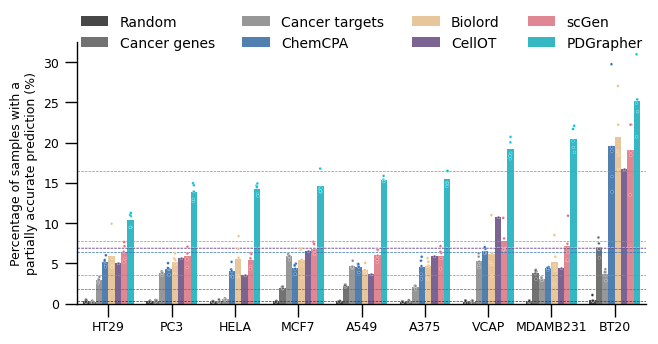

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)

    plt.ylabel('Percentage of samples with a\npartially accurate prediction (%)')
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred.pdf'))
    plt.show()




## Panel ranking

/tmp/ipykernel_2438579/1143507007.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


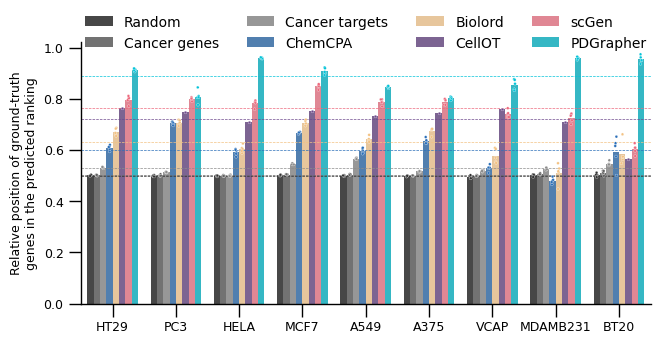

In [11]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the data for 'rankings' into a DataFrame
metric = 'rankings'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)

    plt.ylabel('Relative position of ground-truth\ngenes in the predicted ranking')
    plt.savefig(osp.join(outdir, 'panel_ranking.pdf'))
    plt.show()


## Panel recall@1

/tmp/ipykernel_2438579/2163801977.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


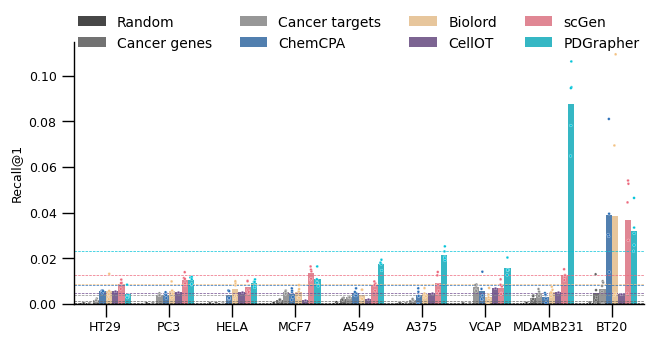

In [12]:

# Extract the data for 'rankings' into a DataFrame
metric = 'recall@1'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)

    plt.ylabel('Recall@1')
    plt.savefig(osp.join(outdir, 'panel_recall@1.pdf'))
    plt.show()

## Recall@10

/tmp/ipykernel_2438579/2247850566.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


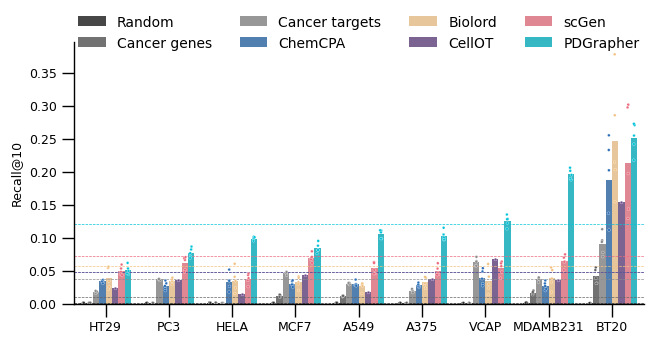

In [13]:

# Extract the data for 'rankings' into a DataFrame
metric = 'recall@10'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)

    plt.ylabel('Recall@10')
    plt.savefig(osp.join(outdir, 'panel_recall@10.pdf'))
    plt.show()

## Recall@100

/tmp/ipykernel_2438579/542365893.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


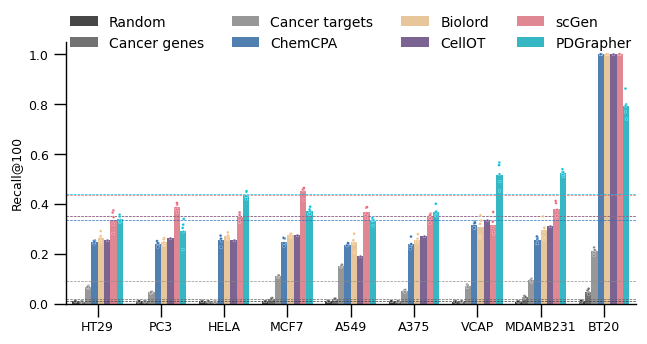

In [14]:

# Extract the data for 'rankings' into a DataFrame
metric = 'recall@100'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']


with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)

    plt.ylabel('Recall@100')
    plt.savefig(osp.join(outdir, 'panel_recall@100.pdf'))
    plt.show()

## Recall@1000

/tmp/ipykernel_2438579/1955555881.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


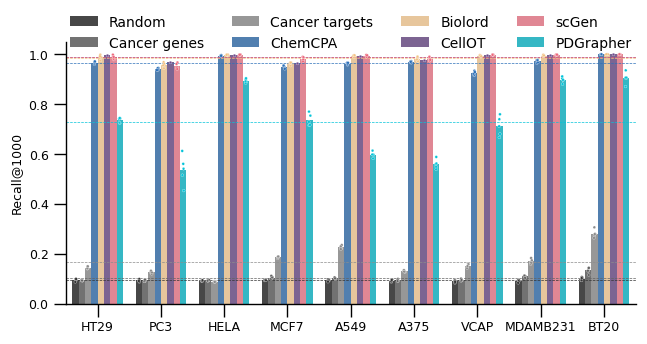

In [15]:

# Extract the data for 'rankings' into a DataFrame
metric = 'recall@1000'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)

    plt.ylabel('Recall@1000')
    plt.savefig(osp.join(outdir, 'panel_recall@1000.pdf'))
    plt.show()

## Panels distance between predicted genes and GT genes in the PPI (PDGrapher vs random)

In [16]:

import torch
import networkx as nx
import pickle

outdir = 'distance_predicted_targets_and_gt'


all_lengths_ours_to_real = {}
all_lengths_random_to_real = {}
cell_line_path_dict = {}

for cell_line in ["A549", "A375", "BT20", "HELA", "HT29", "MCF7", "MDAMB231", "PC3", "VCAP"]:
    #Loads edge index 
    base_path = "../../data/processed/torch_data/chemical/real_lognorm"
    path_edge_index = osp.join(base_path, 'edge_index_{}.pt'.format(cell_line))
    edge_index = torch.load(path_edge_index)
    G = nx.Graph() 
    G.add_edges_from(tuple(zip(edge_index[0,:].tolist(), edge_index[1,:].tolist())))
    performance = pd.read_csv('../../results_metrics_aggregated_bme/perturbagen_pred/PDgrapher/within/chemical/val/{}_drugpred_within_best.csv'.format(cell_line))
    ngnn = performance[performance['Set'] == 'Test']['GNN'].iloc[0]
    model_path = glob('../../experiments_resubmission_bme/results/chemical/{}_corrected_pos_emb/n_gnn_{}*'.format(cell_line, ngnn))[0]
    random_path = '../../baselines/mechanistic/results/mechanistic/baseline_random_chemical/random/{}/random'.format(cell_line)
    our_predicted_interventions = pickle.load(open(osp.join(model_path, 'retrieved_interventions.pkl'), "rb"))
    our_real_interventions = pickle.load(open(osp.join(model_path, 'real_interventions.pkl'), "rb"))
    random_predicted_interventions = pickle.load(open(osp.join(random_path, 'retrieved_interventions.pkl'), "rb"))
    random_real_interventions = pickle.load(open(osp.join(random_path, 'real_interventions.pkl'), "rb"))
    for i in our_real_interventions.keys():
        assert len(our_predicted_interventions[i]) == len(our_real_interventions[i]), "predicted and real interventions should have the same length (our model)"
        assert len(random_predicted_interventions[i]) == len(random_real_interventions[i]), "predicted and real interventions should have the same length (random model)"
        assert len(random_predicted_interventions[i]) == len(our_predicted_interventions[i]), "our model and random model should have the same length"
    #Outpath
    outpath = osp.join(outdir, '/'.join(model_path.split('/')[-2:]))
    os.makedirs(outpath, exist_ok=True)
    cell_line_path_dict[cell_line] = outpath
    #Computes the distances if not pre-saved
    if not os.path.exists(osp.join(outpath, 'random_to_real.txt')):
        length = dict(nx.all_pairs_shortest_path_length(G))
        lengths_ours_to_real = []
        lengths_random_to_real = []
        for split_index in our_predicted_interventions.keys():
            pred_ours = our_predicted_interventions[split_index]
            pred_random = random_predicted_interventions[split_index]
            real = our_real_interventions[split_index]
            for i in range(len(pred_ours)):
                pred_ours_i = pred_ours[i]
                pred_random_i = pred_random[i]
                real_i = real[i]
                for j in range(len(real_i)):
                    for jj in range(len(real_i)):
                        lengths_ours_to_real.append(length[real_i[j]][pred_ours_i[jj]])
                        lengths_random_to_real.append(length[real_i[j]][pred_random_i[jj]])
        pd.DataFrame(lengths_random_to_real).to_csv(osp.join(outpath, 'random_to_real.txt'), index=False, header=None)
        pd.DataFrame(lengths_ours_to_real).to_csv(osp.join(outpath, 'ours_to_real.txt'), index=False, header=None)
    else:
        lengths_random_to_real = pd.read_csv(osp.join(outpath, 'random_to_real.txt'),header=None)[0].tolist()
        lengths_ours_to_real = pd.read_csv(osp.join(outpath, 'ours_to_real.txt'),  header=None)[0].tolist()
    all_lengths_ours_to_real[cell_line] = lengths_ours_to_real
    all_lengths_random_to_real[cell_line] = lengths_random_to_real



/home/gonzag46/scratch/conda/envs/pdgrapher/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# ##STATS - computation-heavy
# #Need to do this in 
# def calculate_effect_size(U, n1, n2):
#     # Calculate the rank-biserial correlation based on the U statistic
#     return 1 - (2*U) / (n1*n2)

# def bootstrap_ci(group1, group2, n_bootstrap=1000, ci=95):
#     # Calculate the observed effect size
#     U_observed, _ = stats.mannwhitneyu(group1, group2, alternative='less')
#     observed_effect_size = calculate_effect_size(U_observed, len(group1), len(group2))
#     # Generate bootstrap samples and compute effect sizes
#     bootstrapped_effect_sizes = []
#     for _ in range(n_bootstrap):
#         # Resampling with replacement within each group
#         sample1 = np.random.choice(group1, size=len(group1), replace=True)
#         sample2 = np.random.choice(group2, size=len(group2), replace=True)
#         # Calculate the U statistic for the bootstrap sample
#         U, _ = stats.mannwhitneyu(sample1, sample2, alternative='less')
#         effect_size = calculate_effect_size(U, len(sample1), len(sample2))
#         bootstrapped_effect_sizes.append(effect_size)
#     # Compute the percentiles for the confidence interval
#     lower_bound = np.percentile(bootstrapped_effect_sizes, (100-ci)/2)
#     upper_bound = np.percentile(bootstrapped_effect_sizes, 100 - (100-ci)/2)
#     return (lower_bound, upper_bound)



# #Stats for individual cell lines
# for cell_line in all_lengths_ours_to_real:
#     lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
#     lengths_random_to_real = all_lengths_random_to_real[cell_line]
#     log = open(osp.join(outpath, 'log_avg_distance.txt'), 'w')
#     log.write('avg distance in network\t{:.2f} ± {:.2f}\n'.format(np.mean(lengths_ours_to_real), np.std(lengths_ours_to_real)))
#     t_stat, p_value = stats.ttest_ind(lengths_ours_to_real, lengths_random_to_real, alternative='less')
#     log.write('Average distance for random:\t{}\n'.format(np.mean(lengths_random_to_real)))
#     log.write('Average distance for PDGrapher:\t{}\n'.format(np.mean(lengths_ours_to_real)))
#     log.write('P-value t-test of PDGrapher distances being smaller than random:\t{}\n'.format(p_value))
#     t_stat, p_value = stats.mannwhitneyu(lengths_ours_to_real, lengths_random_to_real, alternative='less')
#     log.write('Median distance for random:\t{}\n'.format(np.median(lengths_random_to_real)))
#     log.write('Median distance for PDGrapher:\t{}\n'.format(np.median(lengths_ours_to_real)))
#     log.write('Statistic MW-test of PDGrapher distances being smaller than random:\t{}\n'.format(t_stat))
#     log.write('P-value MW-test of PDGrapher distances being smaller than random:\t{}\n'.format(p_value))
#     n1 = len(lengths_ours_to_real)
#     n2 = len(lengths_random_to_real)
#     r = 1 - (2 * t_stat) / (n1 * n2)
#     log.write('Effect size:\t{}\n'.format(r))
#     confidence_interval = bootstrap_ci(lengths_ours_to_real, lengths_random_to_real)
#     log.write('Confidence intervanl:\t{}'.format(confidence_interval))
#     # #Let's test if my data comes from a normal distribution
#     # norm_sample = np.random.normal(np.mean(legths_ours_to_real), np.std(legths_ours_to_real), size=len(legths_ours_to_real))
#     # ks_statistic, p_value = stats.ks_2samp(legths_ours_to_real, norm_sample)
#     log.close()


# #Stats for all cell lines together
# lengths_ours_to_real = np.concatenate([all_lengths_ours_to_real[e] for e in all_lengths_ours_to_real]).tolist()
# lengths_random_to_real = np.concatenate([all_lengths_random_to_real[e] for e in all_lengths_random_to_real]).tolist()

# log = open(osp.join(outpath, '../../log_avg_distance_alltogether.txt'), 'w')
# log.write('avg distance in network\t{:.2f} ± {:.2f}\n'.format(np.mean(lengths_ours_to_real), np.std(lengths_ours_to_real)))
# t_stat, p_value = stats.ttest_ind(lengths_ours_to_real, lengths_random_to_real, alternative='less')
# log.write('Average distance for random:\t{}\n'.format(np.mean(lengths_random_to_real)))
# log.write('Average distance for PDGrapher:\t{}\n'.format(np.mean(lengths_ours_to_real)))
# log.write('P-value t-test of PDGrapher distances being smaller than random:\t{}\n'.format(p_value))
# t_stat, p_value = stats.mannwhitneyu(lengths_ours_to_real, lengths_random_to_real, alternative='less')
# log.write('Median distance for random:\t{}\n'.format(np.median(lengths_random_to_real)))
# log.write('Median distance for PDGrapher:\t{}\n'.format(np.median(lengths_ours_to_real)))
# log.write('Statistic MW-test of PDGrapher distances being smaller than random:\t{}\n'.format(t_stat))
# log.write('P-value MW-test of PDGrapher distances being smaller than random:\t{}\n'.format(p_value))
# n1 = len(lengths_ours_to_real)
# n2 = len(lengths_random_to_real)
# r = 1 - (2 * t_stat) / (n1 * n2)
# log.write('Effect size:\t{}\n'.format(r))
# confidence_interval = bootstrap_ci(lengths_ours_to_real, lengths_random_to_real)
# log.write('Confidence intervanl:\t{}'.format(confidence_interval))
# # #Let's test if my data comes from a normal distribution
# # norm_sample = np.random.normal(np.mean(legths_ours_to_real), np.std(legths_ours_to_real), size=len(legths_ours_to_real))
# # ks_statistic, p_value = stats.ks_2samp(legths_ours_to_real, norm_sample)
# log.close()








In [17]:

#Put all data together
lengths_ours_to_real = np.concatenate([all_lengths_ours_to_real[e] for e in all_lengths_ours_to_real]).tolist()
lengths_random_to_real = np.concatenate([all_lengths_random_to_real[e] for e in all_lengths_random_to_real]).tolist()
data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
data.columns = ['distance', 'Model']

colors = ['#04C4D9', '#333333']

with sns.plotting_context(plotting_context_small):
    sns.set_palette(sns.color_palette(colors))

    weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
    weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
    weights = np.concatenate([weights_ours, weights_random])
    data['weights'] = weights
    ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

    ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
    sns.move_legend(
                        ax, "lower left",
                        bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
                    )
    plt.subplots_adjust(top=0.9, right=0.95, left=0.2)
    plt.savefig(osp.join(outpath, '../../panel_distribution_network_distance_model_vs_random_alltogether.pdf'.format(cell_line)), transparent=True)
    plt.close()

In [18]:

#Individual plots

for cell_line in all_lengths_ours_to_real.keys():
    lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
    lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
    data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
    data.columns = ['distance', 'Model']

    colors = ['#04C4D9', '#333333']

    with sns.plotting_context(plotting_context_small):
        sns.set_palette(sns.color_palette(colors))

        weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
        weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
        weights = np.concatenate([weights_ours, weights_random])
        data['weights'] = weights
        ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

        ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
        sns.move_legend(
                            ax, "lower left",
                            bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
                        )
        plt.subplots_adjust(top=0.9, right=0.95, left=0.2)
        plt.savefig(osp.join(cell_line_path_dict[cell_line], 'panel_distribution_network_distance_model_vs_random_{}.pdf'.format(cell_line)), transparent=True)
        plt.close()
            